<a href="https://colab.research.google.com/github/saied-ahemd/data_Analysis_With_Paython-/blob/main/dataAnalysisWithPaython_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

In [21]:
df = pd.read_csv('sales_data.csv.txt')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [23]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


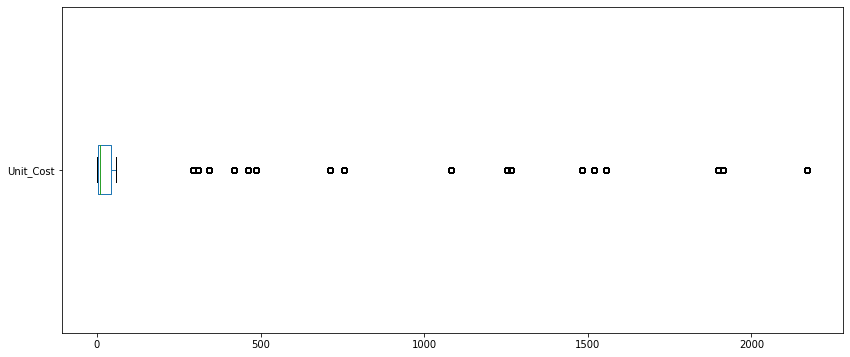

In [24]:
df['Unit_Cost'].plot(kind='box',vert=False,figsize=(14,6))

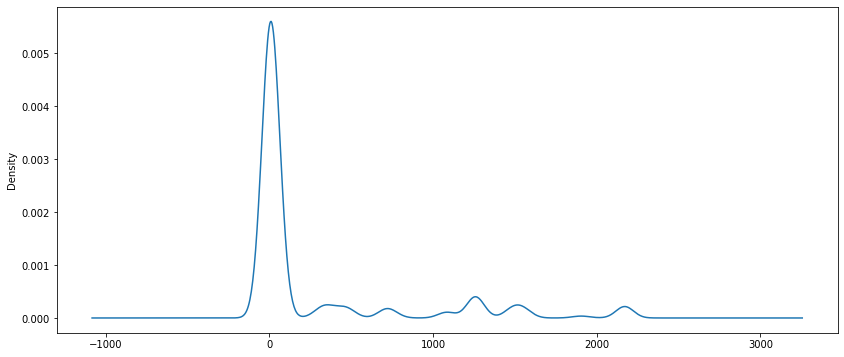

In [25]:
# we can do density plot
df['Unit_Cost'].plot(kind='density',figsize=(14,6))

Text(0.5, 0, 'dollors')

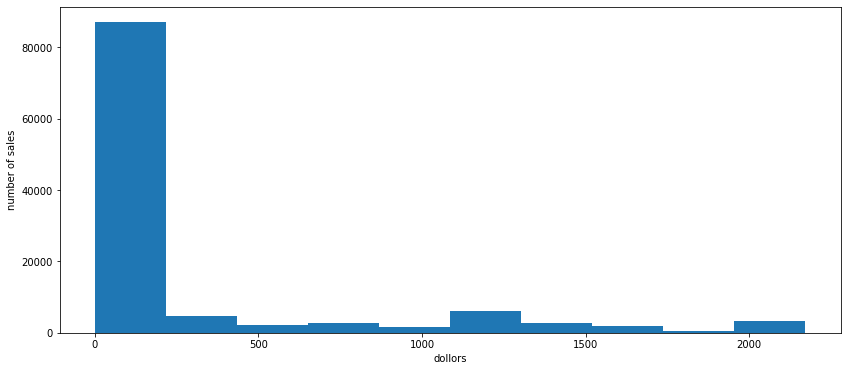

In [26]:
# we can make a hist 
hs = df['Unit_Cost'].plot(kind='hist',figsize=(14,6))
hs.set_ylabel('number of sales')
hs.set_xlabel('dollors')


In [27]:
df['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

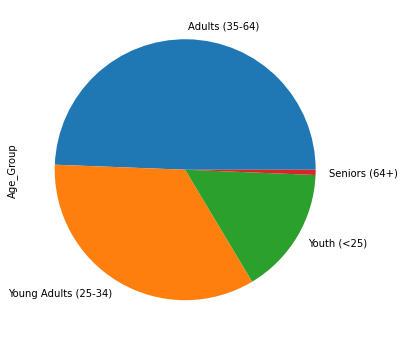

In [28]:
# i can make visual pie plot to the age group
df['Age_Group'].value_counts().plot(kind='pie',figsize=(14,6))

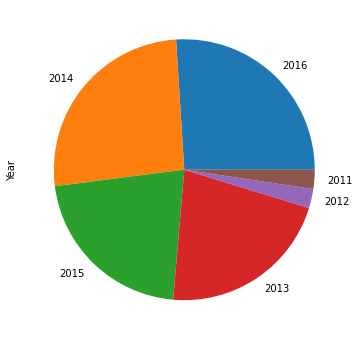

In [29]:
# how manay sales per year do we have 
df['Year'].value_counts().plot(kind='pie',figsize=(14,6))

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64


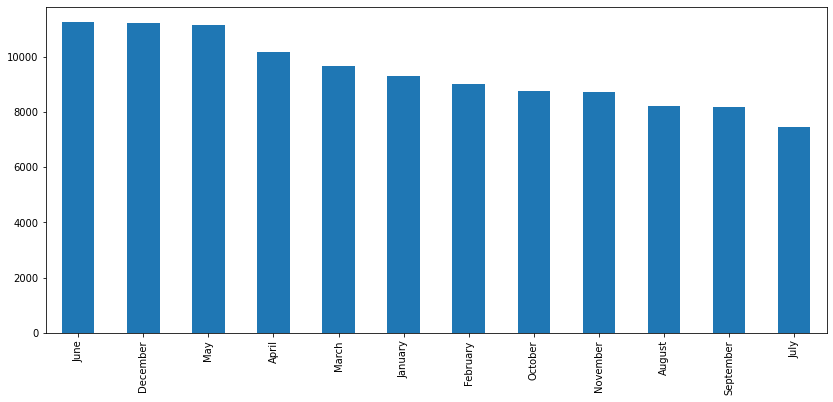

In [30]:
# how many sales per month do we have 
print(df['Month'].value_counts())
# and now we will plot this as bar
df['Month'].value_counts().plot(kind='bar',figsize=(14,6))

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64


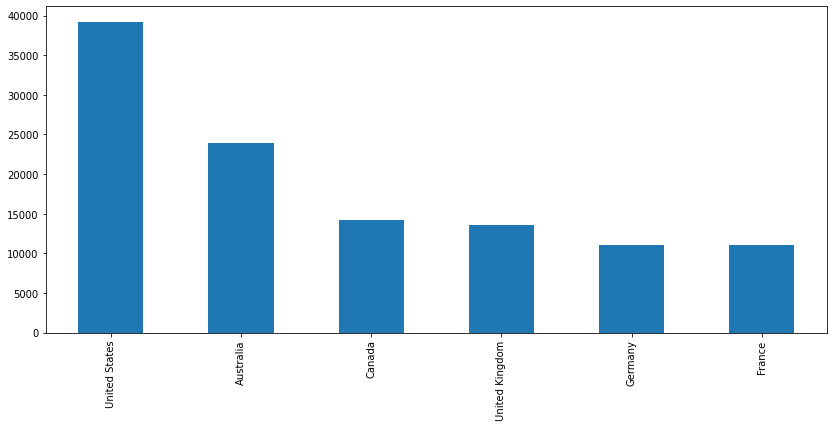

In [31]:
# Which country has the most sales quantity of sales
print(df['Country'].value_counts())
# now let's plot this 
df['Country'].value_counts().plot(kind='bar',figsize=(14,6))

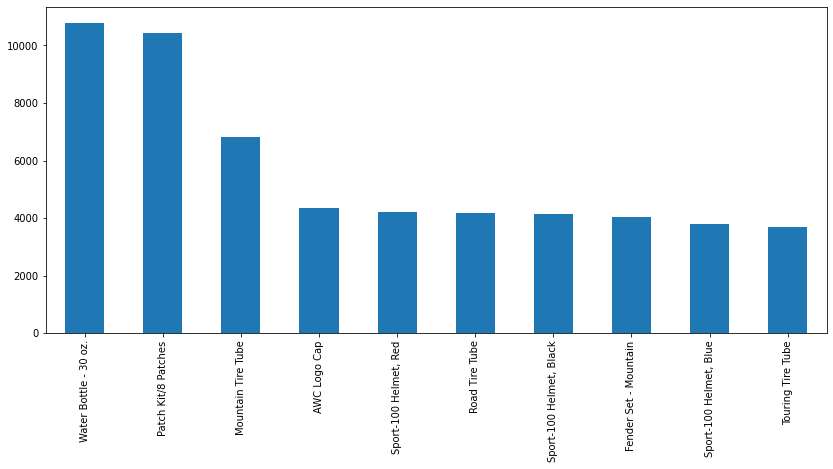

In [32]:
#  Create a list of every product sold
df['Product'].unique()
df['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

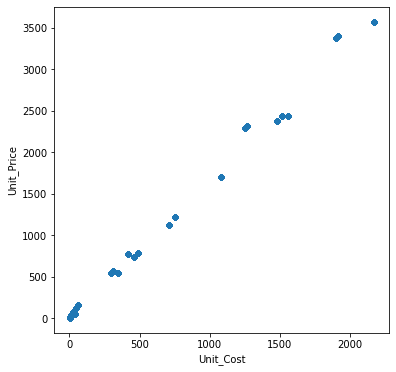

In [33]:
# Can you see any relationship between Unit_Cost and Unit_Price?
df.plot(kind='scatter',x='Unit_Cost',y='Unit_Price',figsize=(6,6))

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


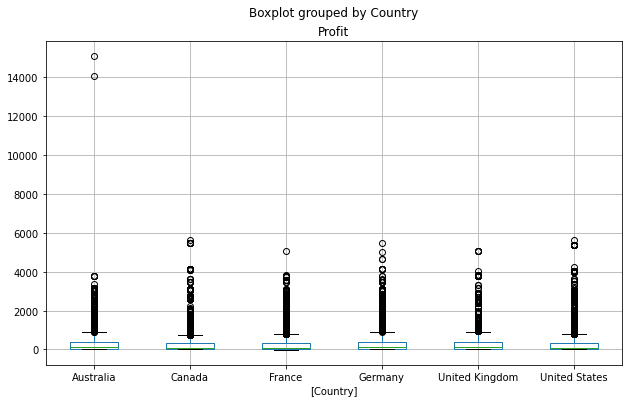

In [34]:
# Can you see any relationship between Profit per Country
df[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

In [35]:
# Add and calculate a new Calculated_Date column
df['Calculated_Date'] = df[['Year','Month','Day']].apply(lambda x:f'{x[0]} {x[1]} {x[2]}',axis=1)
df['Calculated_Date'].head()

0    2013 November 26
1    2015 November 26
2       2014 March 23
3       2016 March 23
4         2014 May 15
Name: Calculated_Date, dtype: object

In [36]:
# Parse your Calculated_Date column into a datetime object
df['Calculated_Date'] = pd.to_datetime(df['Calculated_Date'])
df['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

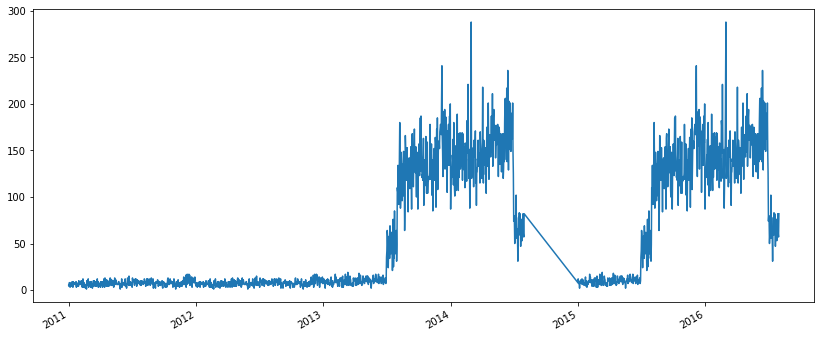

In [37]:
# How did sales evolve through the years
df['Calculated_Date'].value_counts().plot(kind='line',figsize=(14,6))

In [38]:
# now we will load the data from a dataset
conn = sqlite3.connect('sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [39]:
# cleaning the data
# her we see that pandas ignore all the nan value of the operation
print(pd.Series([1, 2, np.nan]).count())
print(pd.Series([1, 2, np.nan]).sum())
print(pd.Series([1, 2, np.nan]).mean())

2
3.0
1.5


In [40]:
# now we will use the fille na method to fill the nan value

s = pd.Series([1, 2, 3, np.nan, np.nan, 4])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [41]:
# fill all the nan value with zero and this is a bad shit to do
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [42]:
# now we will fill the nan value with the mean value of all the data
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [43]:
# now we will use fillna method what this method do is fill the nan with the previous value
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [44]:
# now we will use billna method what this method do is fill the nan with the next value
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [45]:
# deal with un non data

df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
# now in this dataset it seem that there are somr invaild data like age 290 and sex  D ?


In [46]:
# what i will do i replace all the d and ? with M or F
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [47]:
# now what i want to do is if there is any value greater then 100 divied by 10
df.loc[df['Age'] > 100,'Age'] = df.loc[df['Age'] > 100,'Age'] /10
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


In [48]:
# now we will move to the Duplicates part how to deal with this
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], 
index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [49]:
# the most importtant method to deal with this is duplicated and drop_duplicates
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [50]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [51]:
# now we will deal with the same shit but as a dataframe
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [52]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [53]:
players.drop_duplicates(subset=['Name'],keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [54]:
# now we will deal the most hard one is text handeling
# we will start with Splitting Columns
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})


In [55]:
df = df['Data'].str.split('_',expand=True)

In [56]:
# now i will rename the coulmn
df.columns = ['Year', 'Sex', 'Country', 'No Children']
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [57]:
# now we can see that in the year coulmn we have '?' so need to remove it 
# contains take a regax expertion
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [58]:
# we can see in the contry col there are some dump spaces 
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [59]:
# and now i will do re to replace space with no space
df['Country'].str.replace(' ','')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [60]:
# now i will remove the ? from the year col
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

Text(0.5, 1.0, 'My Nice Plot')

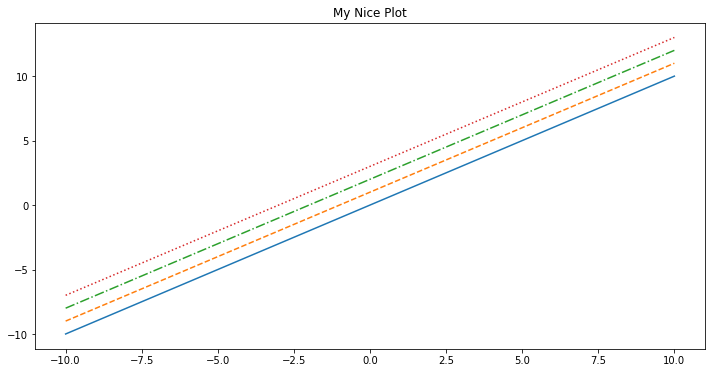

In [63]:
# we can use matlib to plot some amazing plots
x = np.arange(-10,11)
fig, axes = plt.subplots(figsize=(12, 6))

plt.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28ab841fd0>,
       dtype=object))

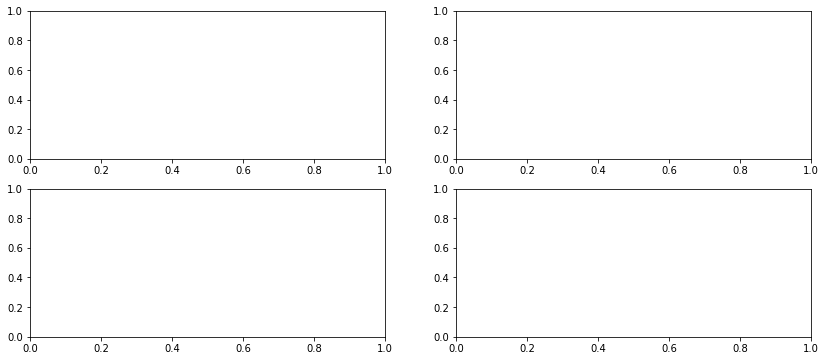

In [67]:
# now we can make subplot and choose the number of rows and col
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

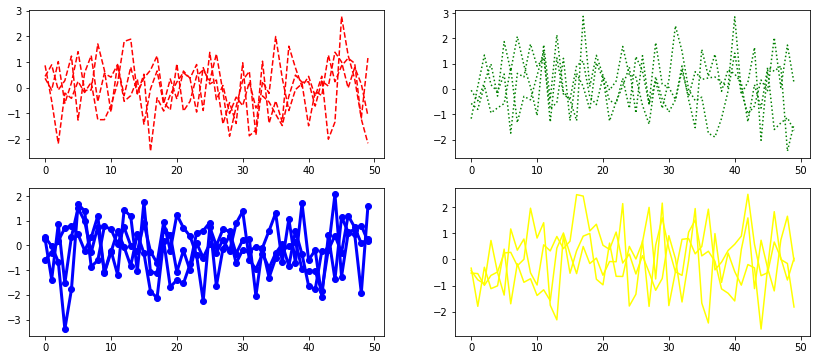

In [70]:

ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)
fig

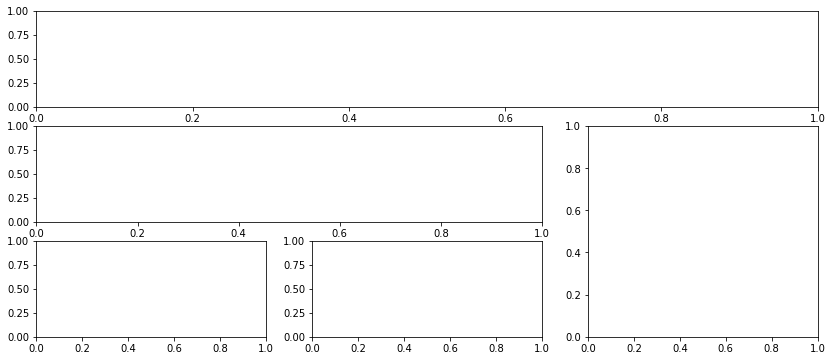

In [71]:
# i can make the subplot more complex

plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

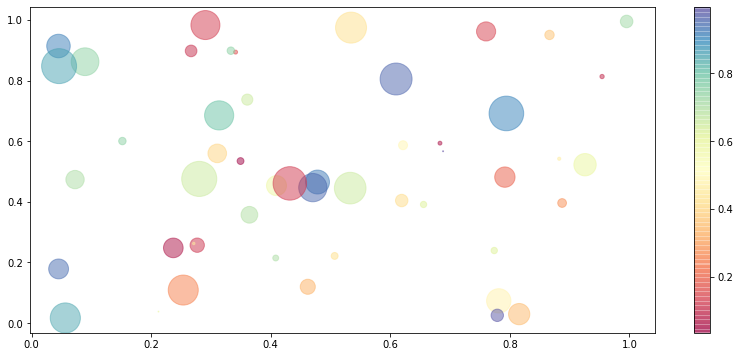

In [73]:
# now let's make a nice scatter plot

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()